Question 1
Use fig.add_[h/v]line() and fig.add_[h/v]rect() to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of flipper_length_mm for each species onto plotly histograms of flipper_length_mm for each species in the penguins dataset

According to the Chatbot, to achieve this in Plotly, we can create histograms for the flipper_length_mm variable for each species in the Penguins dataset, and use the add_vline() method to mark vertical lines at the mean and median values, while using add_vrect() to highlight ranges such as:

1. Load the Penguins dataset and separate the data by species.
2. For each species:
Compute the descriptive statistics (mean, median, standard deviation, min, max, Q1, and Q3).
Plot the histogram of flipper_length_mm.
Use add_vline() to mark the mean and median.
Use add_vrect() to highlight the ranges (min-max, IQR, and mean ± 2*std).

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing 'flipper_length_mm' or 'species'
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Define function to plot histogram with vertical lines and rectangles
def plot_flipper_length_distribution(species_name, data):
    # Filter data for the species
    species_data = data[data['species'] == species_name]
    
    # Compute statistics
    mean_val = species_data['flipper_length_mm'].mean()
    median_val = species_data['flipper_length_mm'].median()
    std_val = species_data['flipper_length_mm'].std()
    min_val = species_data['flipper_length_mm'].min()
    max_val = species_data['flipper_length_mm'].max()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)
    
    # Create histogram
    fig = px.histogram(species_data, x="flipper_length_mm", title=f'{species_name} Flipper Length Distribution')
    
    # Add vertical lines (mean and median)
    fig.add_vline(x=mean_val, line_dash="dash", line_color="blue", annotation_text="Mean", annotation_position="top left")
    fig.add_vline(x=median_val, line_dash="dot", line_color="green", annotation_text="Median", annotation_position="top right")
    
    # Add vertical rectangles for ranges
    # Range (min to max)
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="lightblue", opacity=0.2, line_width=0, annotation_text="Range", annotation_position="bottom right")
    
    # Interquartile Range (Q1 to Q3)
    fig.add_vrect(x0=q1, x1=q3, fillcolor="lightgreen", opacity=0.3, line_width=0, annotation_text="IQR", annotation_position="bottom left")
    
    # Range (mean ± 2 std)
    fig.add_vrect(x0=mean_val - 2 * std_val, x1=mean_val + 2 * std_val, fillcolor="lightcoral", opacity=0.2, line_width=0, annotation_text="±2 Std", annotation_position="top right")
    
    fig.show()

# List of unique species
species_list = penguins['species'].unique()

# Plot histograms for each species
for species in species_list:
    plot_flipper_length_distribution(species, penguins)


For each species in the Penguins dataset, I filter the data and compute relevant statistics like mean, median, standard deviation, minimum, maximum, and interquartile range (Q1, Q3). For plotly.express.histogram(), I ploted the distribution of flipper_length_mm, using add_vline() to draw lines for the mean and median values, with different styles (dash for the mean and dot for the median). Specifically, This code will generate separate histograms for each species, marking the requested statistics onto each plot.

Question 2
Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using seaborn kernel density estimation (KDE) plots to produce the desired figures organized in row of three plots

Based on the description of the chatbot, to accomplish this using Seaborn KDE plots, I'll have to plot the density of flipper_length_mm for each species and overlay the mean, median, and the different ranges (min-max, IQR, and mean ± 2 * std) on the KDE plots. Additionally, I have to organize the plots in a single row with three subplots.

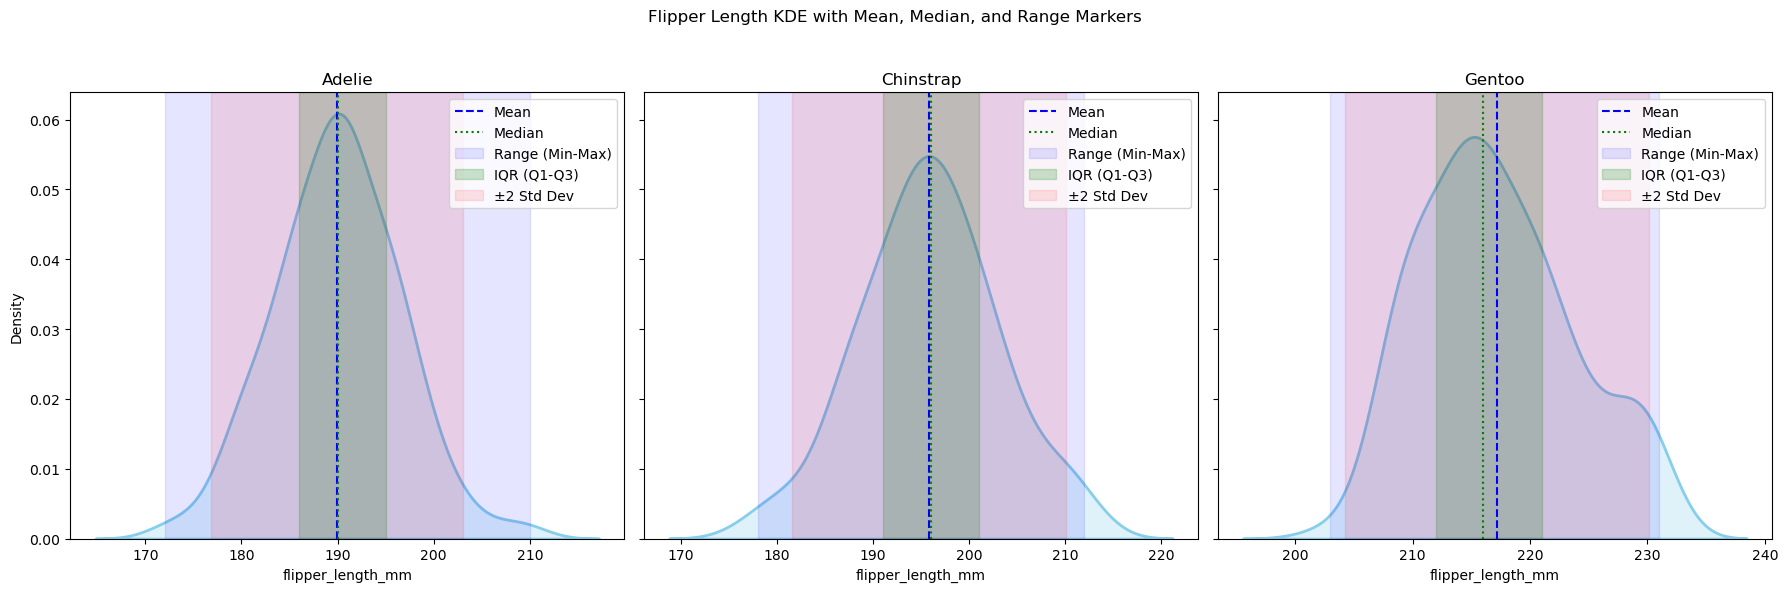

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing 'flipper_length_mm' or 'species'
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Set up the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Flipper Length KDE with Mean, Median, and Range Markers')

# Define function to create KDE plot with additional markers
def plot_kde_with_markers(ax, species_name, data):
    # Filter data for the species
    species_data = data[data['species'] == species_name]['flipper_length_mm']
    
    # Compute statistics
    mean_val = species_data.mean()
    median_val = species_data.median()
    std_val = species_data.std()
    min_val = species_data.min()
    max_val = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    
    # Plot KDE
    sns.kdeplot(species_data, ax=ax, fill=True, color='skyblue', linewidth=2)
    ax.set_title(f'{species_name}')
    
    # Add vertical lines for mean and median
    ax.axvline(mean_val, color='blue', linestyle='--', label='Mean')
    ax.axvline(median_val, color='green', linestyle=':', label='Median')
    
    # Add shaded areas for ranges
    # Range (min to max)
    ax.axvspan(min_val, max_val, alpha=0.1, color='blue', label='Range (Min-Max)')
    
    # Interquartile range (Q1 to Q3)
    ax.axvspan(q1, q3, alpha=0.2, color='green', label='IQR (Q1-Q3)')
    
    # Range (mean ± 2 * std)
    ax.axvspan(mean_val - 2 * std_val, mean_val + 2 * std_val, alpha=0.1, color='red', label='±2 Std Dev')
    
    # Add legend
    ax.legend()

# List of unique species
species_list = penguins['species'].unique()

# Plot KDE for each species in a separate subplot
for i, species in enumerate(species_list):
    plot_kde_with_markers(axes[i], species, penguins)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title
plt.show()


From the previous records, the [sns.kdeplot()] function is used to create kernel density estimates for each species' flipper length distribution. Using Matplotlib's ax.axvline() to add lines For the mean and median values, the chatbot uses the Matplotlib's ax.axvline() to add lines. Using plt.subplots() to create three subplots (one for each species) arranged in a single row, each subplot shows us the KDE plot with overlaid markers and ranges.
The Visualization Layout displayed that the KDE plots are displayed side-by-side for easy comparison across species, with the relevant statistical markers clearly indicated.

Question 3
Search online for some images of box plots, histograms, and kernel density estimators (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference

Basically my descritpion of each single graphs(Based on my perspective), my preference I wrote to the chatbot were stated that box plot basically describes the Interquartile range, which gives out from Q1 to Q3 easily. It also displays the median. The 4 quadrants each basically give out 25% of the test sample. For histograms, it is much easier to describe the shape of it. Emphasizing it is either skewed to the left, to the right, or whether it is normal or bimodal. It also shows the mean of the data set. Kernel Density estimators basically demonstrates the estimated probability value of the data set. This description is based on my personal perspective.

What the Chatbot responds to me was that my description for most of the display graphs is mostly accurate, but it corrected me by providing me a better version with a much more precise explanation:

For box plot: The term median should be used instead of "medium." The box plot doesn’t explicitly show all 4 quadrants but rather divides the data into quartiles (which, in essence, splits it into four parts). Additionally, while outliers are often represented as dots or stars outside the whiskers, not all box plots show them unless specified.

For histogram: A histogram does not directly show the mean (as you mentioned). It shows the frequency distribution of data, and from the shape, you can infer central tendencies like mean and median, but they aren’t explicitly marked on the plot unless added manually.

For kernel density estimators (KDE): The term "estimated probability value" can be a bit unclear. KDE estimates the density of the data, which is related to the probability distribution, not directly the probability of individual data points. KDE shows where data points are concentrated but doesn’t give probabilities of specific outcomes.

In summary for pros and cons of the each data set display according to the chatbot, box Plots are great for summarizing key distribution statistics, spotting outliers, and comparing across groups, but they lack detail about the distribution's shape. On the other hand, histograms are excellent for visualizing the shape of the data and identifying the overall shape of the data and identifying skewness, modality, or outliers, though sensitive to bin choice and lacking smoothness. KDEs offer smooth and flexible probability density estimates, providing more detail than histograms, but require careful tuning of bandwidth and are less intuitive for non-expert users.

Question 4
Run the code below and look at the resulting figure of distrubutions and then answer the following questions
1. Which datasets have similar means and similar variances
2. Which datasets have similar means but quite different variances
3. Which datasets have similar variances but quite different means
4. Which datasets have quite different means and quite different variances

In [4]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. Which datasets have similar means and similar variances
Based from the dataset demonstrated above, to look for the datasets that have the similar means and variances, we would need to search for datasets where the peaks of the distributions are centered around the same point and have similar spread/width. This is where dataset B and dataset C comes in similarity, which both are centered around 5-6 and have similar spreads with a standard deviation of 0.5
2. Which datasets have similar means but quite different variances
We can tell that datasets B and C qualify for this question. Above by the model, although the means might be similar for both B and C, dataset C is bimodal, with two clusters having different spreads compared to dataset B's unimodal distribution, which by display it showed a noraml distribution. Datasets B (Mean = 4.95, Variance = 2.23) and C (Mean = 4.99, Variance = 9.05) have very close means but quite different variances.
3. Which datasets have similar variances but quite different means
Data sets C and D: These have similar variances but different means, as C is centered around 8 and D around 6. 
Data C has the mean = 8, variance = 0.5^2 = 0.25 and dataset D has the mean = 6, variance = 0.5^2
4. Which datasets have quite different means and quite different variances
Data sets A and D: Dataset A (uniform distribution) has a much larger spread than dataset D (normal distribution), and their means are quite different. Dataset A has a Mean = 5.06, variance = 8.46 and Dataset D has a mean = 5.99, variance = 0.24. Therefore, both have different means and different variances.

Question 5
Start a new ChatBot session to explore the general relationship between the mean and median and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the mean and median and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.

This is the general Relationship Between Mean and Median with "Right" and "Left" Skewness
Right (positive) skewness, given by the chatbot:

In a distribution with right skewness, the tail on the right side (positive side) of the distribution is longer than on the left. The mean is greater than the median because the mean is more affected by extreme large values (outliers) in the tail.

In a distribution with left skewness, the tail on the left side (negative side) of the distribution is longer. The mean is less than the median because the mean is pulled down by extreme low values in the left tail.

In summary:
In right-skewed data: mean > median.
In left-skewed data: mean < median.

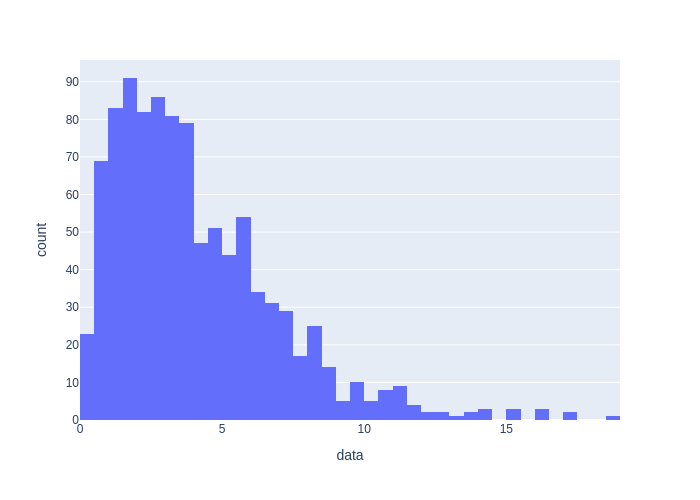

In [5]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# Generating a sample from a right-skewed gamma distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Plotting a histogram of the data (shows the distribution of sample1)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
fig1.show(renderer="png")  # This command is for rendering images in some environments like GitHub or MarkUs

# Calculating the mean of sample1
sample1.mean()

# Calculating the median of sample1
np.quantile(sample1, [0.5])  # Median is the 50th percentile

# Generating a left-skewed sample by flipping the right-skewed gamma distribution
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)


According to the chatbot, this is what the code generates, which is a right-skewed dataset (sample1):

- The Gamma distribution (stats.gamma()) is a positively skewed (right-skewed) distribution.
- a=2 and scale=2 are the shape and scale parameters, and rvs(size=1000) generates 1,000 random samples from this distribution.

- px.histogram() from Plotly is used to visualize the distribution of sample1. This will produce a histogram showing the right-skewed distribution (the tail on the right).

- The mean of the dataset is calculated with sample1.mean(). In a right-skewed distribution, the mean will be greater than the median due to the influence of extreme high values.

- The median is calculated using np.quantile(sample1, [0.5]). This returns the 50th percentile of the data.

- There's a left-skewed distribution is created by flipping the right-skewed sample1 values by negating them (-sample1). This reflects the Gamma distribution over the y-axis, creating a distribution with a longer left tail (negative skew).


Question 6
Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data

In [6]:
# Maybe something like this? Feel free to use this one 
# if it strikes your fancy after look around a bit
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


These are the summary label from the data:
[restaurant id]: Identifier for the restaurant.
[category id]: Identifier for the food category.
[item id]: Identifier for the specific food item.
[serving size (oz)]: Serving size of the food item (in ounces).
[calories]: Total calories in the food item.
[calories from fat]: Calories from fat in the food item.
[total fat (g)]: Total fat content (in grams).
[total fat (% daily value)]: Percentage of daily recommended fat intake.
[saturated fat (g)]: Saturated fat content (in grams).
[saturated fat (% daily value)]: Percentage of daily recommended saturated fat intake.
[trans fat (g)]: Trans fat content (in grams).
[cholesterol (mg)]: Cholesterol content (in milligrams).
[cholesterol (% daily value)]: Percentage of daily recommended cholesterol intake.
[sodium (mg)]: Sodium content (in milligrams).
[sodium (% daily value)]: Percentage of daily recommended sodium intake.
[carbohydrates (g)]: Carbohydrates content (in grams).
[carbohydrates (% daily value)]: Percentage of daily recommended carbohydrates intake.
[dietary fiber (g)]: Dietary fiber content (in grams).
[dietary fiber (% daily value)]: Percentage of daily recommended fiber intake.
[sugars (g)]: Sugar content (in grams).
[protein (g)]: Protein content (in grams).
[vitamin a (% daily value)]: Percentage of daily recommended Vitamin A intake.
[vitamin c (% daily value)]: Percentage of daily recommended Vitamin C intake.
[calcium (% daily value)]: Percentage of daily recommended calcium intake.
[iron (% daily value)]: Percentage of daily recommended iron intake.

This is the summary statistics reveal some interesting aspects of the nutritional data from the dataset:

- Calories:
Average: 296.15 kcal
Minimum: 0 kcal (some items may contain negligible calories, possibly beverages or condiments).
Maximum: 1880 kcal (indicative of high-calorie, large-sized fast food items).
- Fats:
Total fat isn't listed directly in this summary, but saturated fat and trans fat are notable:
Average saturated fat: 3.41 g (ranges from 0 to 30 g).
Trans fat: While the average is low (0.6 g), it can go as high as 9 g.
- Cholesterol:
Average: 44.95 mg, but some items reach up to 575 mg, which is quite high.
- Sodium:
The average sodium content is 361.55 mg, but certain items can go as high as 3930 mg, which is extremely high and potentially alarming for daily sodium intake.
- Carbohydrates:
Average: 69.57 g
Maximum: 340 g, possibly from sugary drinks or high-carb dishes.
- Sugars:
The sugar content varies dramatically, with some items having as much as 128 g of sugar.
Protein:
- Average: 11.4 g, with the highest being 118 g, indicating the presence of high-protein items (possibly meats or protein-heavy meals).

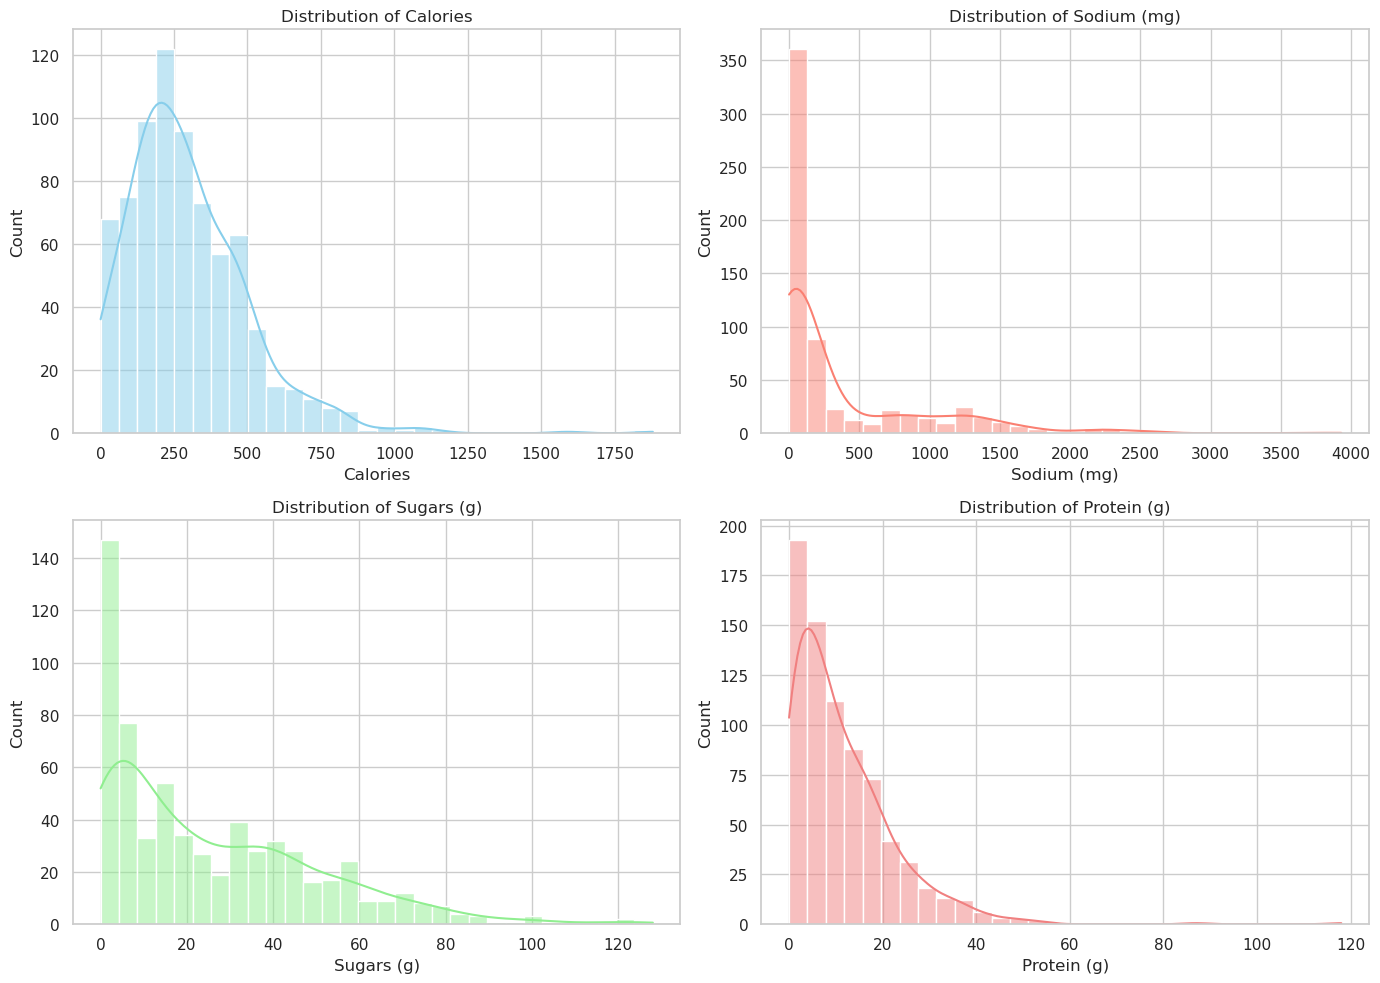

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
df = pd.read_csv(url)

# Set the plot style for better readability
sns.set(style="whitegrid")

# Create subplots to visualize distribution of key nutritional aspects
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Calories Distribution
sns.histplot(df['calories'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Calories')
axes[0, 0].set_xlabel('Calories')

# Sodium Distribution
sns.histplot(df['sodium (mg)'], bins=30, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribution of Sodium (mg)')
axes[0, 1].set_xlabel('Sodium (mg)')

# Sugars Distribution
sns.histplot(df['sugars (g)'], bins=30, kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribution of Sugars (g)')
axes[1, 0].set_xlabel('Sugars (g)')

# Protein Distribution
sns.histplot(df['protein (g)'], bins=30, kde=True, ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Distribution of Protein (g)')
axes[1, 1].set_xlabel('Protein (g)')

# Adjust layout
plt.tight_layout()
plt.show()


Based on the histographs, we can now find the highlighted key distributions in the dataset:
- Calories: Most food items cluster around the lower to mid-range of calories (around 150–400 kcal), but there are outliers that have significantly higher calorie counts.
- Sodium: A broad distribution of sodium content is observed, with some items containing very high amounts, making it a potential concern for individuals watching their sodium intake.
- Sugars: The majority of items have low to moderate sugar content, but there are significant outliers with high sugar levels, likely from sugary drinks or desserts.
- Protein: The distribution shows that most food items have a moderate protein content, though there are a few high-protein outliers.
- These insights reveal the varying nutritional qualities across fast food items, with certain items posing potential dietary risks due to high sodium, sugar, and calorie content.

Question 7
Watch the classic Gapminder Video, then have a look at the plotly version and recreate the animation (perhaps after optionally exploring and changing the style, if you wish)

In [8]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [9]:
import plotly.graph_objects as go

import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
dataset = pd.read_csv(url)

years = ["1952", "1962", "1967", "1972", "1977", "1982", "1987", "1992", "1997", "2002",
         "2007"]

# make list of continents
continents = []
for continent in dataset["continent"]:
    if continent not in continents:
        continents.append(continent)
# make figure
fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}

# fill in most of layout
fig_dict["layout"]["xaxis"] = {"range": [30, 85], "title": "Life Expectancy"}
fig_dict["layout"]["yaxis"] = {"title": "GDP per Capita", "type": "log"}
fig_dict["layout"]["hovermode"] = "closest"
fig_dict["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 500, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 300,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Year:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

# make data
year = 1952
for continent in continents:
    dataset_by_year = dataset[dataset["year"] == year]
    dataset_by_year_and_cont = dataset_by_year[
        dataset_by_year["continent"] == continent]

    data_dict = {
        "x": list(dataset_by_year_and_cont["lifeExp"]),
        "y": list(dataset_by_year_and_cont["gdpPercap"]),
        "mode": "markers",
        "text": list(dataset_by_year_and_cont["country"]),
        "marker": {
            "sizemode": "area",
            "sizeref": 200000,
            "size": list(dataset_by_year_and_cont["pop"])
        },
        "name": continent
    }
    fig_dict["data"].append(data_dict)

# make frames
for year in years:
    frame = {"data": [], "name": str(year)}
    for continent in continents:
        dataset_by_year = dataset[dataset["year"] == int(year)]
        dataset_by_year_and_cont = dataset_by_year[
            dataset_by_year["continent"] == continent]

        data_dict = {
            "x": list(dataset_by_year_and_cont["lifeExp"]),
            "y": list(dataset_by_year_and_cont["gdpPercap"]),
            "mode": "markers",
            "text": list(dataset_by_year_and_cont["country"]),
            "marker": {
                "sizemode": "area",
                "sizeref": 200000,
                "size": list(dataset_by_year_and_cont["pop"])
            },
            "name": continent
        }
        frame["data"].append(data_dict)

    fig_dict["frames"].append(frame)
    slider_step = {"args": [
        [year],
        {"frame": {"duration": 300, "redraw": False},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
        "label": year,
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)


fig_dict["layout"]["sliders"] = [sliders_dict]

fig = go.Figure(fig_dict)

fig.show()

Question 8
Provide a second version of the figure from the previous problem where you edit the fig = px.scatter() function from the Gapminder code so that x is "percent change", y is "rank", size is "percent", and color="sex", animation_frame is "year", and animation_group and hover_name are "name". Then use size_max=50, range_x=[-0.005,0.005]) and remove the log_x=True and range_y parameters

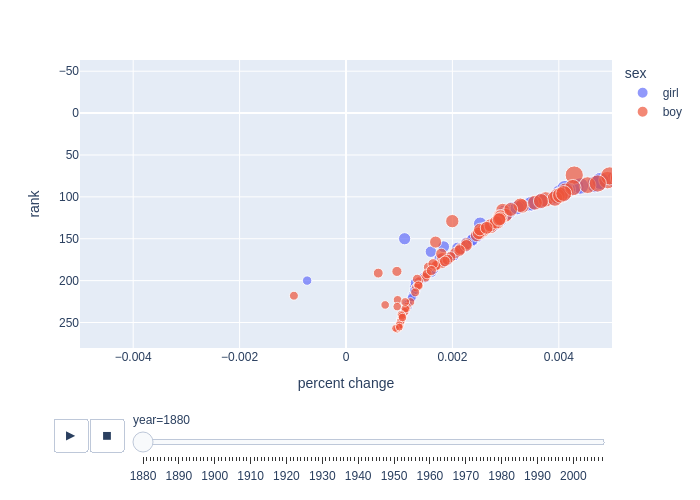

In [14]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Question 9
Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes, I reviewed the course wiki-textbook and interacted with a Chatbot to help you understand all the material in the tutorial and lecture